# Machine Learning based Intrusion Detection System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df1 = pd.read_csv("data/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("data/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("data/MachineLearningCVE/ISCX_Botnet-Testing.pcap_Flow.csv")
df4 = pd.read_csv("data/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df5 = pd.read_csv("data/MachineLearningCVE/AppDDos.pcap_Flow.csv")
df6 = pd.read_csv("data/MachineLearningCVE/Web_Attacks_ours.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1[" Label"].replace("DDoS", "DDoS/DoS", inplace=True)

In [4]:
df3[" Label"].replace("No Label", "Bot", inplace=True)

In [5]:
df4[" Label"].replace("Web Attack � Brute Force", "Web Attack", inplace=True)
df4[" Label"].replace("Web Attack � XSS", "Web Attack", inplace=True)
df4[" Label"].replace("Web Attack � Sql Injection", "Web Attack", inplace=True)

In [6]:
df5[" Label"].replace("No Label", "DDoS/DoS", inplace=True)

In [7]:
df6[" Label"].replace("No Label", "Web Attack", inplace=True)

In [8]:
df=pd.concat([df1,df2,df3,df4,df5,df6], ignore_index=True)

In [9]:
del df1,df2,df3,df4,df5,df6

In [10]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1,1,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1,1,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1,1,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
5,54871,1022.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
6,54925,4.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
7,54925,42.0,1,1,6.0,6.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
8,9282,4.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN
9,55153,4.0,2,0,37.0,0.0,31.0,6.0,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BENIGN


In [11]:
df = df.drop_duplicates()

In [12]:
df.columns = [i.strip() for i in df.columns]

In [13]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [14]:
df.groupby("Label").first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3.0,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
Bot,139,14119.0,10,10,1021.0,807.0,276.0,0.0,102.100000,94.277899,...,8,20,0.0,0.0,0,0,1.310000e+15,5672.124523,1.310000e+15,1.310000e+15
DDoS/DoS,80,1293792.0,3,7,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
PortScan,80,5021059.0,6,5,703.0,1414.0,356.0,0.0,117.166667,181.536131,...,2,32,0.0,0.0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
Web Attack,80,5185118.0,7,7,1022.0,2321.0,372.0,0.0,146.000000,184.078788,...,3,32,0.0,0.0,0,0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00


In [15]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,...,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06,1.120047e+06
mean,6.176139e+03,-9.666769e+07,8.664537e+00,9.582021e+00,1.254204e+03,1.113132e+04,1.972025e+02,1.757125e+01,6.375589e+01,7.282661e+01,...,4.440837e+00,2.231426e+01,5.727841e+04,1.558919e+04,8.689552e+04,4.897747e+04,3.326638e+14,1.955752e+13,3.422742e+14,2.932421e+14
std,1.538468e+04,7.914997e+10,4.681667e+02,6.109718e+02,2.082147e+05,1.358263e+06,9.073471e+02,8.683153e+01,2.550289e+02,3.843640e+02,...,4.454645e+02,8.157014e+00,4.967097e+05,2.178838e+05,6.774451e+05,4.710195e+05,5.569376e+14,1.095764e+14,5.698515e+14,5.410510e+14
min,0.000000e+00,-8.368750e+13,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.620000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,2.246610e+05,3.000000e+00,1.000000e+00,3.800000e+01,5.400000e+01,2.500000e+01,0.000000e+00,8.666667e+00,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.310000e+02,7.320732e+06,5.000000e+00,4.000000e+00,8.800000e+01,4.210000e+02,5.400000e+01,2.500000e+01,4.100000e+01,1.341641e+01,...,2.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+15,2.914932e+04,1.210000e+15,7.300000e+07
max,6.553500e+04,1.200000e+08,2.007550e+05,2.706860e+05,1.420000e+08,6.270000e+08,2.336000e+04,4.030000e+03,4.183057e+03,6.692645e+03,...,1.924910e+05,6.000000e+01,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.590000e+15,9.620000e+14,1.590000e+15,1.590000e+15


In [16]:
df.drop(columns=["Destination Port"], axis=1, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="all", inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
col_mask = df.isnull().any(axis=0) 
row_mask = df.isnull().any(axis=1)
df.drop(df.loc[row_mask, col_mask].index, inplace=True)

[7.61911212e-03 7.33437281e-03 4.80307219e-03 5.58643452e-03
 4.89158027e-03 1.06129576e-02 1.34494510e-02 1.09494236e-02
 6.48743551e-03 2.22845293e-02 1.69785879e-02 2.56496860e-02
 1.51059131e-02 2.67994816e-03 7.24462123e-03 7.57181468e-03
 5.88782040e-03 8.21865362e-03 6.83021345e-03 8.63987269e-03
 5.57310263e-03 9.33661308e-03 6.24760219e-03 4.79744647e-03
 8.32585208e-03 1.44895934e-03 2.11031481e-03 3.29316245e-03
 5.68246847e-04 3.85342225e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.65156894e-03 8.50691403e-03 7.53576433e-03
 5.10678363e-03 1.00219411e-02 1.24797312e-02 1.61498281e-02
 2.24702162e-02 9.91110681e-03 5.21490570e-02 7.65608131e-03
 5.58374603e-03 4.12767242e-02 3.55339603e-02 2.48568857e-02
 1.96318431e-05 4.68327831e-05 1.36054173e-02 1.97836586e-02
 9.85020768e-03 2.69528226e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.31729061e-04 3.26244152e-04
 1.22258408e-02 8.91553517e-03 1.08498855e-02 1.00764235e-02
 5.49421659e-02 1.832264

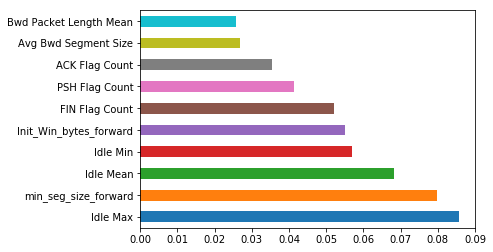

In [21]:
X = df.iloc[:,0:76]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

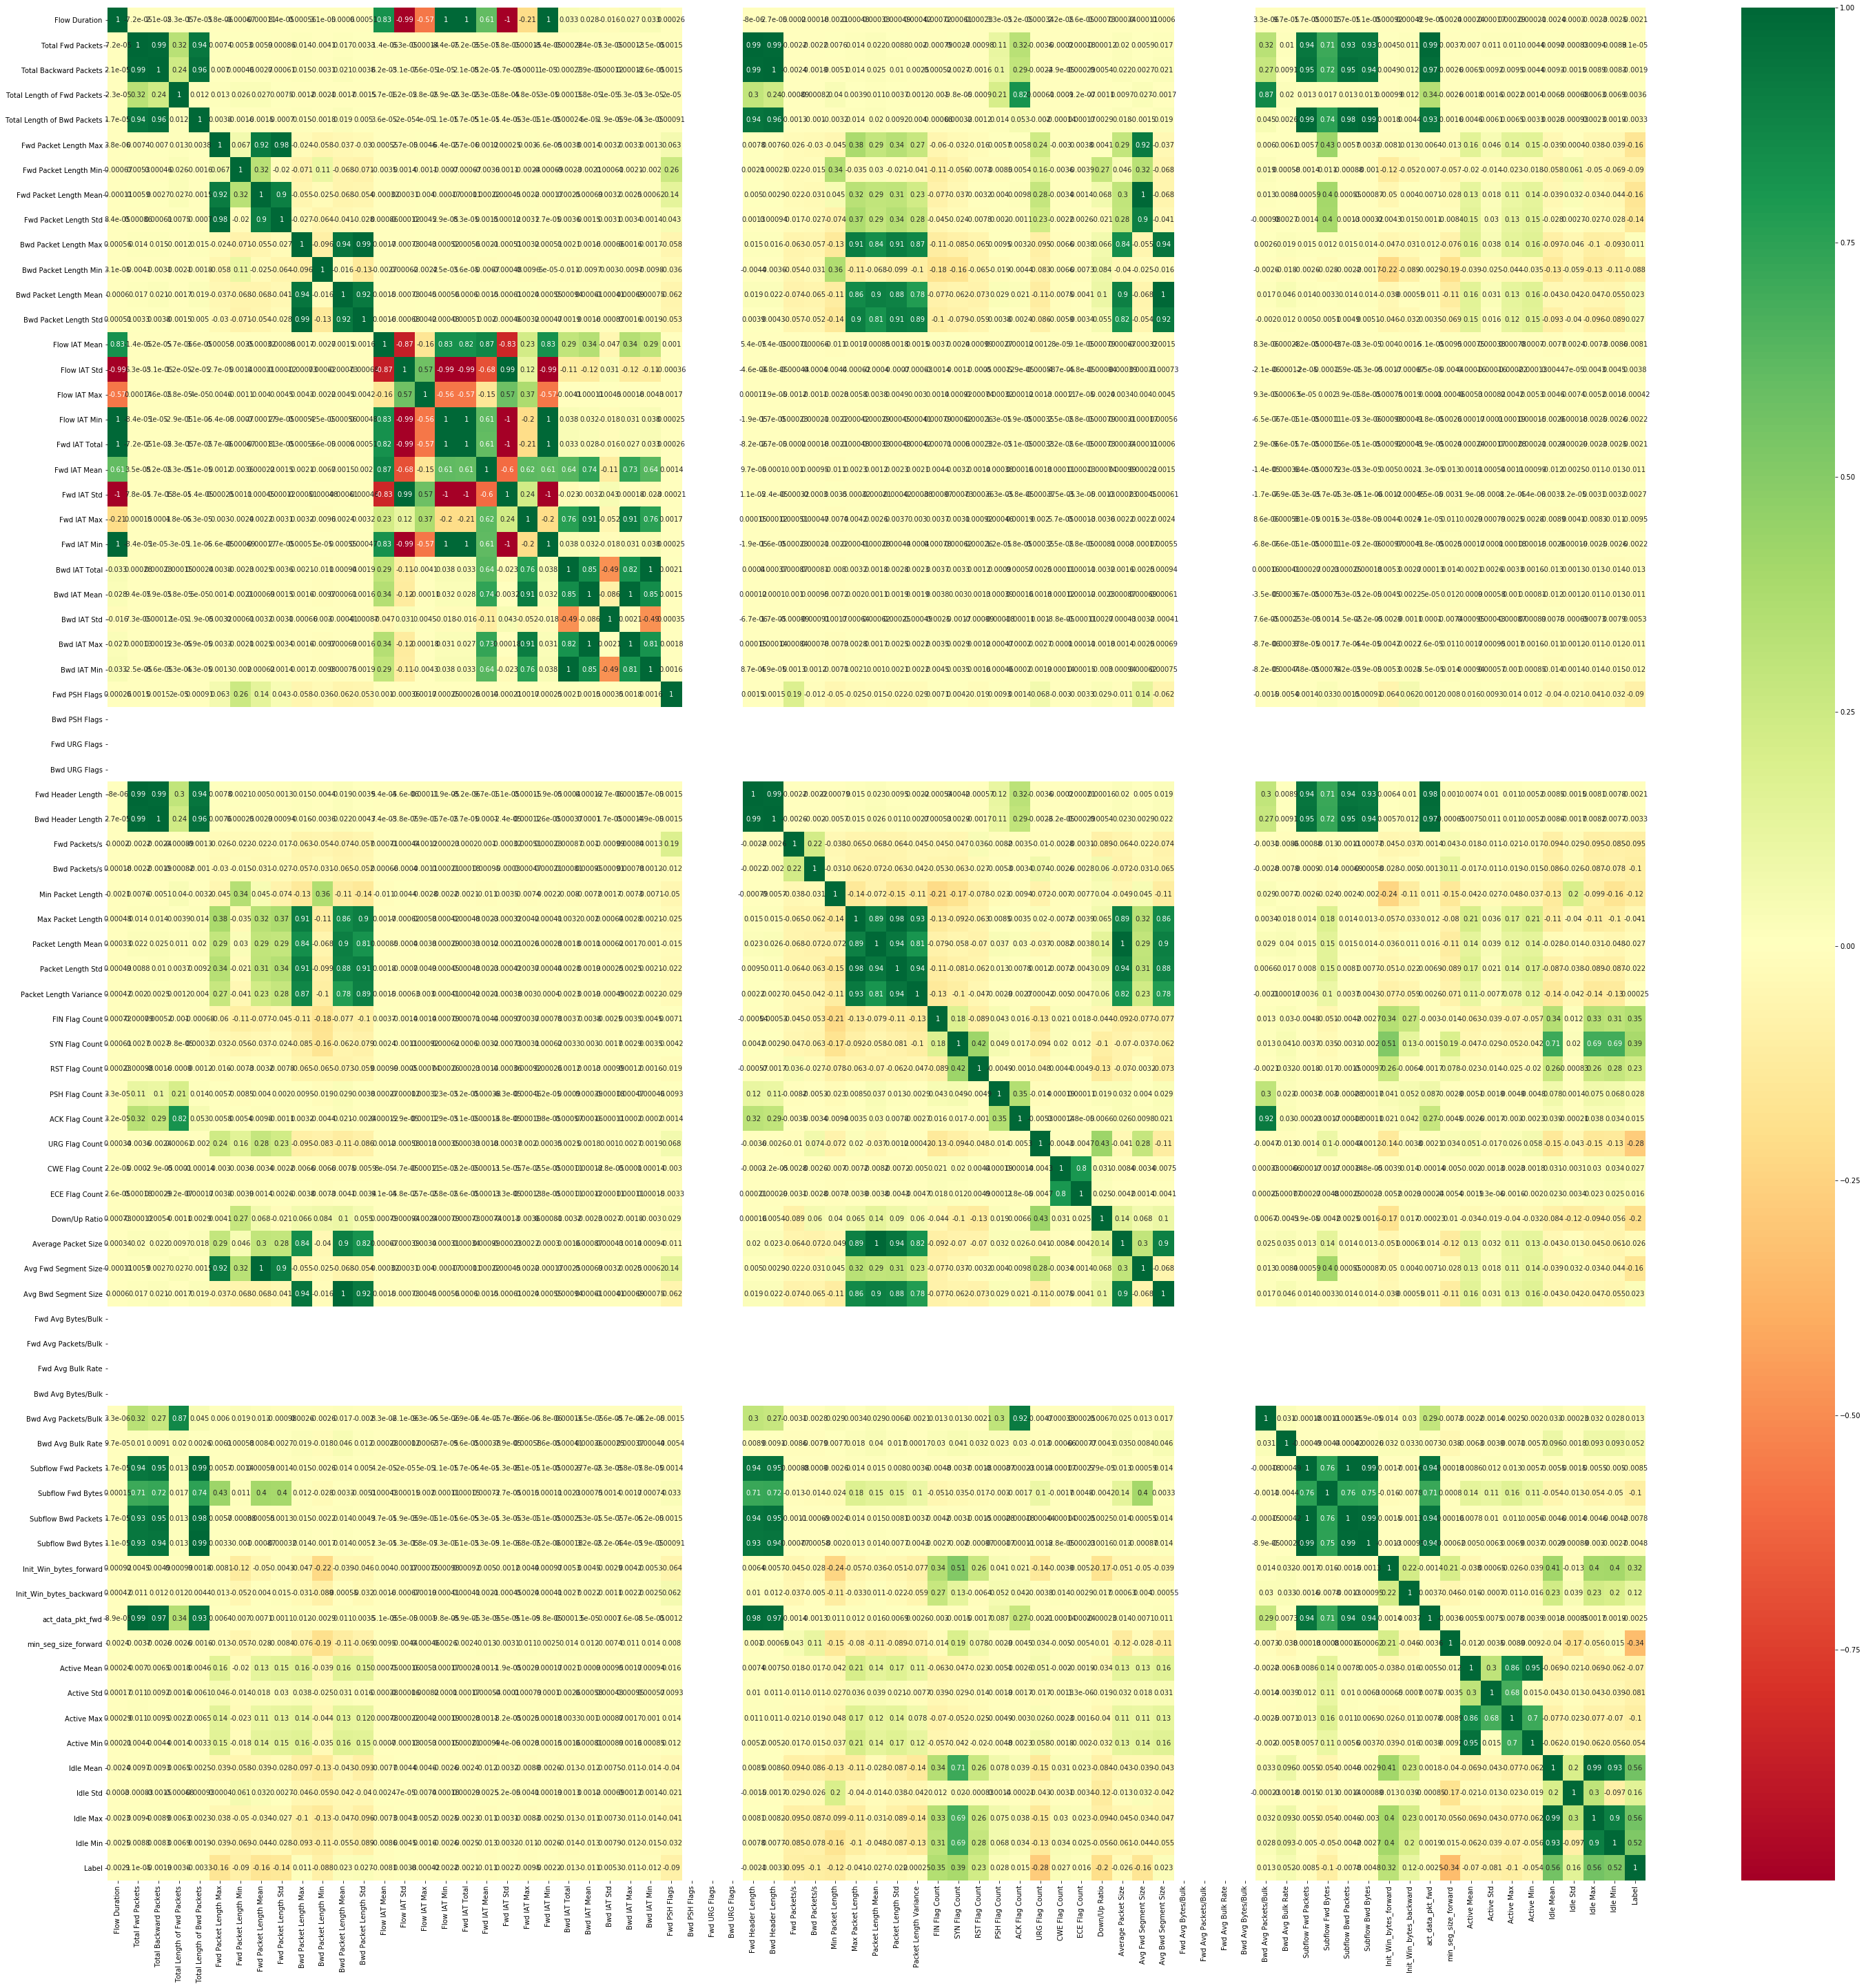

In [22]:
import seaborn as sns
X = df.iloc[:,0:76]
y = df.iloc[:,-1]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [18]:
corr_matrix = df.corr().abs()
to_drop = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and j != "Label":
            if corr_matrix[i][j] > 0.50:
                if j not in to_drop:
                    to_drop.append(j)

In [19]:
df.drop(columns = to_drop, axis = 1, inplace = True)

In [20]:
df.columns

Index(['Fwd Packet Length Min', 'Bwd Packet Length Min', 'Flow Bytes/s',
       'Flow Packets/s', 'Bwd IAT Std', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'FIN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Idle Std', 'Label'],
      dtype='object')

In [21]:
df.head()

,Fwd Packet Length Min,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Bwd IAT Std,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Packets/s,...,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_backward,min_seg_size_forward,Idle Std,Label
0,6.0,0.0,4000000,666666.6667,0.0,0,0,0,0,666666.666700,...,0.0,0,0,0,0,0,-1,20,0.0,BENIGN
1,6.0,6.0,110091.7431,18348.62385,0.0,0,0,0,0,9174.311927,...,1.0,0,0,0,0,0,256,20,0.0,BENIGN
2,6.0,6.0,230769.2308,38461.53846,0.0,0,0,0,0,19230.769230,...,1.0,0,0,0,0,0,256,20,0.0,BENIGN
3,6.0,6.0,352941.1765,58823.52941,0.0,0,0,0,0,29411.764710,...,1.0,0,0,0,0,0,329,20,0.0,BENIGN
4,6.0,0.0,4000000,666666.6667,0.0,0,0,0,0,666666.666700,...,0.0,0,0,0,0,0,-1,20,0.0,BENIGN


In [22]:
df.replace("Infinity", 0.0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df["Flow Packets/s"].replace("Infinity", 0, inplace=True)
df["Flow Packets/s"].replace(np.nan, 0, inplace=True)
df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)

df.replace('Infinity', 0.0, inplace=True)
df.replace('NaN', 0.0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119990 entries, 0 to 1283897
Data columns (total 26 columns):
Fwd Packet Length Min      1119990 non-null float64
Bwd Packet Length Min      1119990 non-null float64
Flow Bytes/s               1119990 non-null object
Flow Packets/s             1119990 non-null object
Bwd IAT Std                1119990 non-null float64
Fwd PSH Flags              1119990 non-null int64
Bwd PSH Flags              1119990 non-null int64
Fwd URG Flags              1119990 non-null int64
Bwd URG Flags              1119990 non-null int64
Fwd Packets/s              1119990 non-null float64
Bwd Packets/s              1119990 non-null float64
Min Packet Length          1119990 non-null float64
FIN Flag Count             1119990 non-null int64
RST Flag Count             1119990 non-null int64
PSH Flag Count             1119990 non-null int64
URG Flag Count             1119990 non-null int64
Down/Up Ratio              1119990 non-null float64
Fwd Avg Bytes/Bulk   

In [24]:
df['Flow Bytes/s'] = np.asarray(df['Flow Bytes/s'].astype('float64'))
df['Flow Packets/s'] = np.asarray(df['Flow Packets/s'].astype('float64'))
df['Fwd PSH Flags'] = df['Fwd PSH Flags'].astype('float64')
df['Bwd PSH Flags'] = df['Bwd PSH Flags'].astype('float64')
df['Fwd URG Flags'] = df['Fwd URG Flags'].astype('float64')
df['Bwd URG Flags'] = df['Bwd URG Flags'].astype('float64')
df['FIN Flag Count'] = df['FIN Flag Count'].astype('float64')
df['RST Flag Count'] = df['RST Flag Count'].astype('float64')
df['PSH Flag Count'] = df['PSH Flag Count'].astype('float64')
df['URG Flag Count'] = df['URG Flag Count'].astype('float64')
df['Fwd Avg Bytes/Bulk'] = df['Fwd Avg Bytes/Bulk'].astype('float64')
df['Fwd Avg Packets/Bulk'] = df['Fwd Avg Packets/Bulk'].astype('float64')
df['Fwd Avg Bulk Rate'] = df['Fwd Avg Bulk Rate'].astype('float64')
df['Bwd Avg Bytes/Bulk'] = df['Bwd Avg Bytes/Bulk'].astype('float64')
df['Bwd Avg Bulk Rate'] = df['Bwd Avg Bulk Rate'].astype('float64')
df['Init_Win_bytes_backward'] = df['Init_Win_bytes_backward'].astype('float64')
df['min_seg_size_forward'] = df['min_seg_size_forward'].astype('float64')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [25]:
df["Label"].value_counts()

DDoS/DoS      388899
BENIGN        376117
Bot           261040
PortScan       90819
Web Attack      3115
Name: Label, dtype: int64

In [26]:
df_ben = df[df['Label'] == 'BENIGN'].sample(n=80000, random_state=42)
df_port = df[df['Label'] == 'PortScan'].sample(n=80000, random_state=42)
df_ddos = df[df['Label'] == 'DDoS/DoS'].sample(n=80000, random_state=42)
df_web = df[df["Label"] == "Web Attack"]
df_bot = df[df['Label'] == 'Bot'].sample(n=80000, random_state=42)

df=pd.concat([df_ben, df_port, df_ddos, df_bot, df_web])

In [27]:
del df_ben, df_port, df_ddos, df_bot, df_web

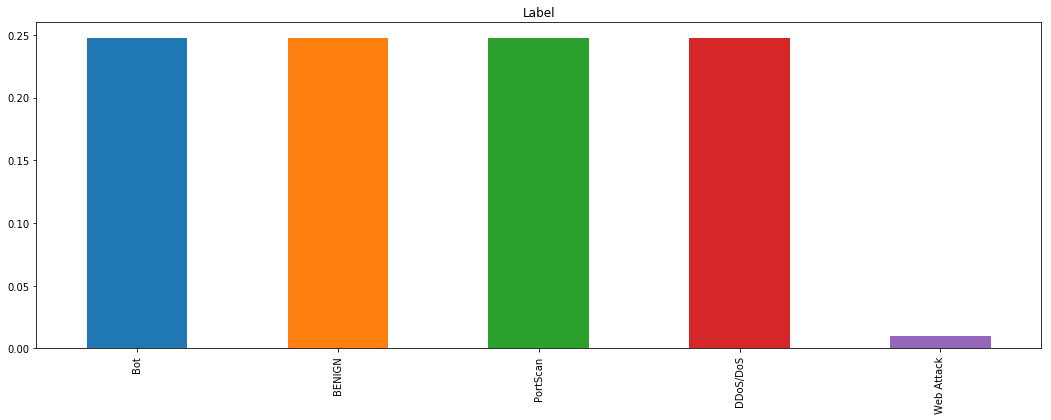

In [28]:
fig = plt.figure(figsize=(18, 6))
df["Label"].value_counts(normalize=True).plot(kind="bar", fig=fig)
plt.title('Label')
plt.show()

In [29]:
df["Label"].value_counts()

Bot           80000
BENIGN        80000
PortScan      80000
DDoS/DoS      80000
Web Attack     3115
Name: Label, dtype: int64

In [30]:
df["Label"].replace("BENIGN", 0, inplace=True)
df["Label"].replace("PortScan", 1, inplace=True)
df["Label"].replace("DDoS/DoS", 2, inplace=True)
df["Label"].replace("Web Attack", 3, inplace=True)
df["Label"].replace("Bot", 4, inplace=True)

In [31]:
X = np.array(df.drop(['Label'], axis=1))
X = preprocessing.scale(X)
y = np.array(df["Label"])

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [32]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [33]:
smt = SMOTE(sampling_strategy='minority')
X, y = smt.fit_sample(X, y)

In [34]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X))

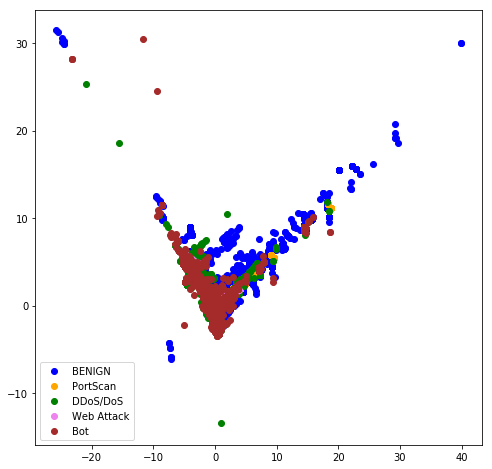

In [35]:
fig = plt.figure(figsize = (8,8))
plt.scatter(transformed[y==0][0], transformed[y==0][1], label='BENIGN', c='blue')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='PortScan', c='orange')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='DDoS/DoS', c='green')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Web Attack', c='violet')
plt.scatter(transformed[y==4][0], transformed[y==4][1], label='Bot', c='brown')

plt.legend()
plt.show()

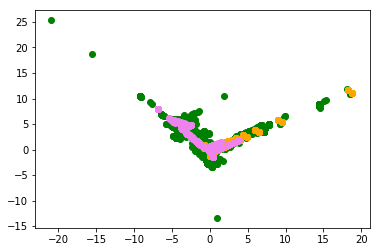

In [36]:
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='DDoS/DoS', c='green')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='PortScan', c='orange')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Web Attack', c='violet')
# plt.scatter(transformed[y==4][0], transformed[y==4][1], label='Bot', c='brown')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

$${Precision} = \frac{True ~ Postive}{True ~ Positive + False ~ Positive}, ~ {Recall} = \frac{True ~ Postive}{True ~ Positive + False ~ Negative}$$ <br> $${F1 ~ Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$ 

In [92]:
clf = RandomForestClassifier(n_estimators=50, max_depth=64, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {round(accuracy * 100, 3)}%')

Accuracy: 96.194%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


0.96194
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20107
           1       1.00      1.00      1.00     19973
           2       0.89      0.93      0.91     20058
           3       1.00      1.00      1.00     20023
           4       0.93      0.89      0.91     19839

    accuracy                           0.96    100000
   macro avg       0.96      0.96      0.96    100000
weighted avg       0.96      0.96      0.96    100000

[[19929     8   101    66     3]
 [   14 19957     0     2     0]
 [   79     0 18693     1  1285]
 [   52     0     0 19970     1]
 [    6     0  2186     2 17645]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


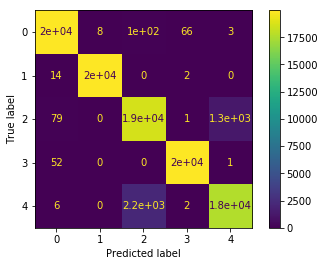

In [45]:
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(clf, X_test, y_test)